In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Search for the 'pout' file with different extensions
candidates = ['pout.tiff', 'pout.tif']
file_path = next((p for p in candidates if os.path.exists(p)), None)
if file_path is None:
    raise FileNotFoundError(f"Pout image not found in paths: {candidates}")

In [5]:
# 1. Read the original image in grayscale
img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

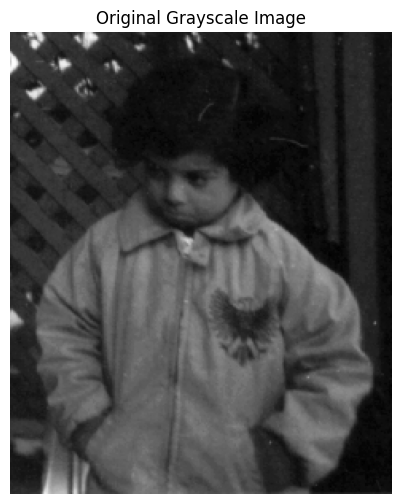

In [6]:
# Display the original grayscale image
plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

In [7]:
# 2. Apply logarithmic transformation
# Compute scaling constant based on the maximum pixel value
c = 255 / np.log1p(np.max(img))
# Apply the log transform and convert back to uint8
log_img = (c * np.log1p(img)).astype(np.uint8)


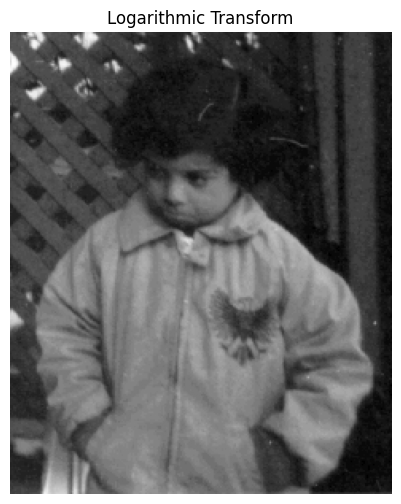

In [8]:
plt.figure(figsize=(6,6))
plt.imshow(log_img, cmap='gray')
plt.title('Logarithmic Transform')
plt.axis('off')
plt.show()

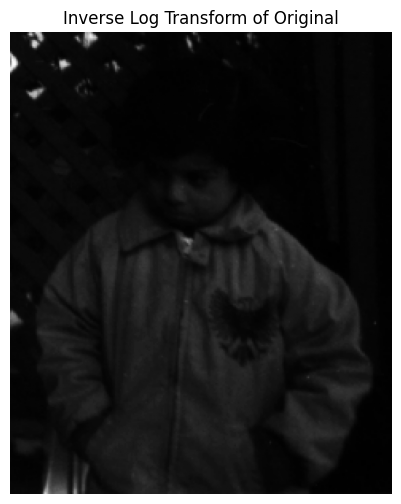

In [9]:
# 3. Inverse log transform applied to the original image
# Apply exponential and rescale to [0, 255]
inv_orig = np.expm1(img / c)
inv_orig = np.clip((inv_orig / np.max(inv_orig)) * 255, 0, 255).astype(np.uint8)
plt.figure(figsize=(6,6))
plt.imshow(inv_orig, cmap='gray')
plt.title('Inverse Log Transform of Original')
plt.axis('off')
plt.show()

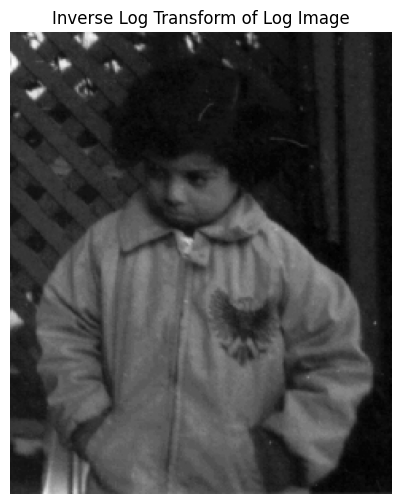

In [10]:
# 4. Inverse log transform applied to the log-transformed image
inv_log = np.expm1(log_img / c)
inv_log = np.clip((inv_log / np.max(inv_log)) * 255, 0, 255).astype(np.uint8)

plt.figure(figsize=(6,6))
plt.imshow(inv_log, cmap='gray')
plt.title('Inverse Log Transform of Log Image')
plt.axis('off')
plt.show()